In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# simple embedding model
model = nn.Linear(32, 128)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# random input
x = torch.randn(512, 32)

def collapse_loss(z):
    mean = z.mean(dim=0)
    return ((z - mean)**2).mean()

var_list = []

for step in range(500):
    z = model(x)

    loss = collapse_loss(z)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 50 == 0:
        var = z.var(dim=0).mean().item()
        var_list.append(var)
        print(f"Step {step}, variance {var:.6f}")

Step 0, variance 0.331019
Step 50, variance 0.128713
Step 100, variance 0.045648
Step 150, variance 0.014748
Step 200, variance 0.004307
Step 250, variance 0.001141
Step 300, variance 0.000277
Step 350, variance 0.000062
Step 400, variance 0.000013
Step 450, variance 0.000003


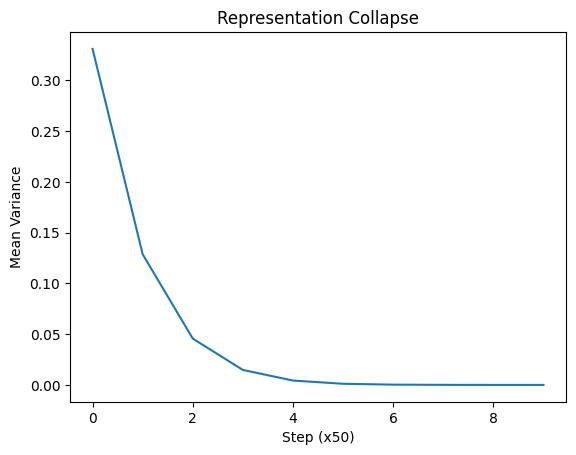

In [5]:
plt.plot(var_list)
plt.xlabel("Step (x50)")
plt.ylabel("Mean Variance")
plt.title("Representation Collapse")
plt.show()

In [6]:
def eigenvalues(z):
    z = z - z.mean(dim=0)
    cov = z.T @ z / z.shape[0]
    eigvals = torch.linalg.eigvalsh(cov)
    return eigvals

z = model(x)

eigvals = eigenvalues(z)

print(eigvals)

tensor([-1.5222e-12, -1.1028e-12, -1.0188e-12, -9.7173e-13, -8.1690e-13,
        -7.7577e-13, -7.7258e-13, -7.1348e-13, -6.6768e-13, -6.0851e-13,
        -5.8298e-13, -5.5838e-13, -5.2388e-13, -5.0984e-13, -4.6069e-13,
        -4.0564e-13, -4.0215e-13, -3.9699e-13, -3.6370e-13, -3.1654e-13,
        -3.1228e-13, -3.0557e-13, -2.7823e-13, -2.7122e-13, -2.5239e-13,
        -2.5091e-13, -2.4650e-13, -2.3117e-13, -2.2167e-13, -2.1466e-13,
        -1.5572e-13, -1.5484e-13, -1.4420e-13, -1.3457e-13, -1.2276e-13,
        -1.1773e-13, -1.0415e-13, -8.7546e-14, -7.8988e-14, -7.6282e-14,
        -6.3051e-14, -6.0900e-14, -5.3169e-14, -5.1501e-14, -3.3663e-14,
        -2.4664e-14, -1.2314e-14, -3.8575e-15, -2.7416e-16,  1.4526e-15,
         8.1583e-15,  1.2531e-14,  2.2985e-14,  2.3096e-14,  2.3239e-14,
         2.7052e-14,  2.9819e-14,  3.3839e-14,  5.7434e-14,  7.7985e-14,
         7.8185e-14,  8.7822e-14,  1.0662e-13,  1.1781e-13,  1.4337e-13,
         1.4632e-13,  1.7693e-13,  1.9386e-13,  1.9

In [12]:
# print eigen values upto 2 decimal places
print(eigvals.round())

tensor([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<RoundBackward0>)


In [16]:
import torch
import torch.nn as nn

model = nn.Linear(32, 128)

x = torch.randn(512, 32)

optimizer = torch.optim.Adam(model.parameters())

eigvals_list = []

def info_nce(z):

    sim = z @ z.T

    labels = torch.arange(z.size(0))

    return nn.CrossEntropyLoss()(sim, labels)

for step in range(500):

    z = model(x)

    loss = info_nce(z)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cov = torch.cov(z.T)

    eigvals = torch.linalg.eigvalsh(cov)

    if step % 50 == 0:
        print("min eig:", eigvals.min().item())
        print("max eig:", eigvals.max().item())
    # step 0 save the eigen values to a list
    if step == 0:
        eigvals_list = [eigvals]
    # step 250 save the eigen values to a list
    if step == 250:
        eigvals_list.append(eigvals)    

min eig: -6.028392363077728e-07
max eig: 3.055051326751709
min eig: -5.849592525919434e-07
max eig: 2.931814193725586
min eig: -7.141837841118104e-07
max eig: 2.954770565032959
min eig: -5.802734222015715e-07
max eig: 2.9871153831481934
min eig: -6.077676175664237e-07
max eig: 3.0341286659240723
min eig: -6.584396601283515e-07
max eig: 3.1089460849761963
min eig: -6.3612185385864e-07
max eig: 3.177077054977417
min eig: -7.262923418238643e-07
max eig: 3.2379236221313477
min eig: -6.720171086271876e-07
max eig: 3.2928318977355957
min eig: -7.089686278050067e-07
max eig: 3.3428637981414795


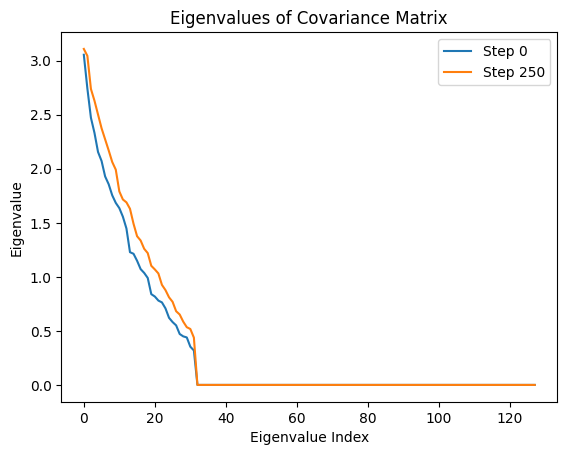

In [20]:
plt.plot(eigvals_list[0].detach().cpu().numpy()[::-1], label="Step 0")
plt.plot(eigvals_list[1].detach().cpu().numpy()[::-1], label="Step 250")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Covariance Matrix")
plt.legend()
plt.show()